In [2]:
import os
import sys
import warnings


sys.path.append(os.path.abspath('../scripts'))
warnings.filterwarnings('ignore')


In [3]:
import sales_analysis as sa
import chi_squaredAnlaysis as chi
import customur_during_before_and_after_holiday_analysis as bda

In [4]:
path = ['../data/train.csv' , '../data/test.csv']
train , test  = sa.load_data(path)

2024-09-21 10:54:48,641 - root - INFO - data loading started


In [5]:
train.shape

(1017209, 10)

## Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?

### i used chi-squared analysis

2024-09-21 10:54:50,124 - root - INFO - check for distribution and plot
2024-09-21 10:54:50,154 - root - INFO - distribution calcualted sucessfully
2024-09-21 10:54:50,281 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-21 10:54:50,311 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


train promo distribution : Promo
0    0.618485
1    0.381515
Name: proportion, dtype: float64
test promo distribution: Promo
0    0.604167
1    0.395833
Name: proportion, dtype: float64


2024-09-21 10:54:50,416 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-21 10:54:50,434 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


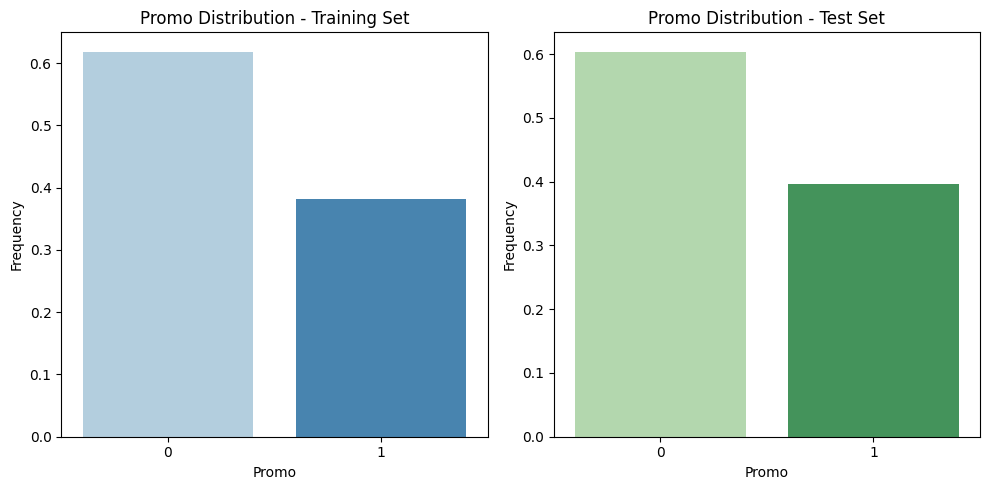

In [6]:
chi.check_for_distribution_and_plot(train,test)

## we can see that it is alsmost have the same distribution

In [7]:
chi.chi_square_test(train,test)

2024-09-21 10:54:51,015 - root - INFO - working on Statistical Test - Chi-Squared Test


Chi-Squared Test Statistic: 0.0008573242970804401
P-Value: 0.9766411974374951
The Promo distributions are similar.


#### The Promo distributions are similar.
#### 2024-09-19 18:02:26,377 - root - INFO - working on Statistical Test - Chi-Squared Test
#### Chi-Squared Test Statistic: 0.0008573242970804401
#### P-Value: 0.9766411974374951


## Check & compare sales behavior before, during, and after holidays

In [8]:
train['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

2024-09-21 10:54:51,127 - root - INFO - Create a new column to mark the time periods: before, during, after holidays


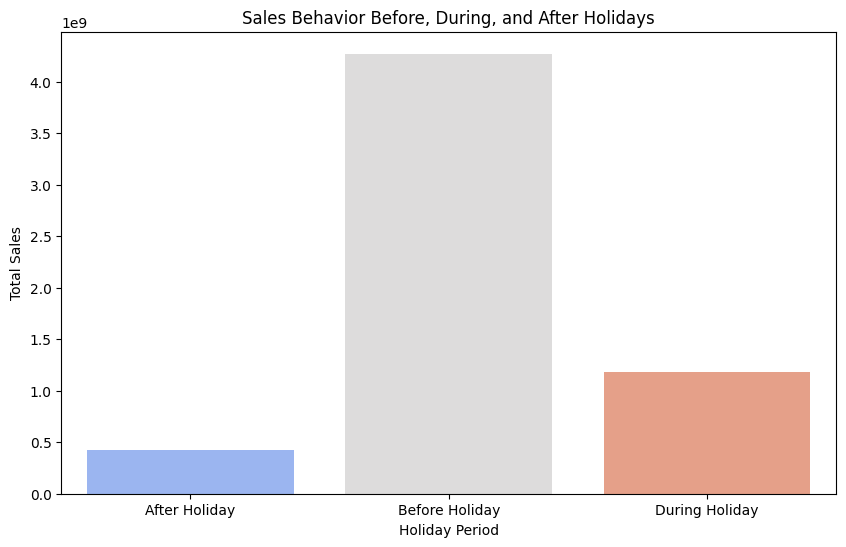

In [9]:
bda.create_a_holiday_period(train)

### i used a Rolling window approach to get the after holiday days 
#### and i take 2 days maximum for the after holiday 

#### this shows that we have this dat 
 #### Holidayperiod
- Before Holiday    758840
- During Holiday    197260
- After Holiday      61109

In [10]:
bda.ab_hypotesesi(train)

2024-09-21 10:54:52,403 - root - INFO - performing the ab hypotesis test over the before during and after holiday sales distribution


ANOVA Test Statistic: 3468.5431665264337
P-Value: 0.0
There is a significant difference in sales behavior across the holiday periods. which in before , During and after Holiday 


### while the p_value for the a/b hypotesis we can conclude that thre is a significance differnce in sales behaviour since p_value < 0.5 

## Find out any seasonal (Christmas, Easter, etc) purchase behaviors,

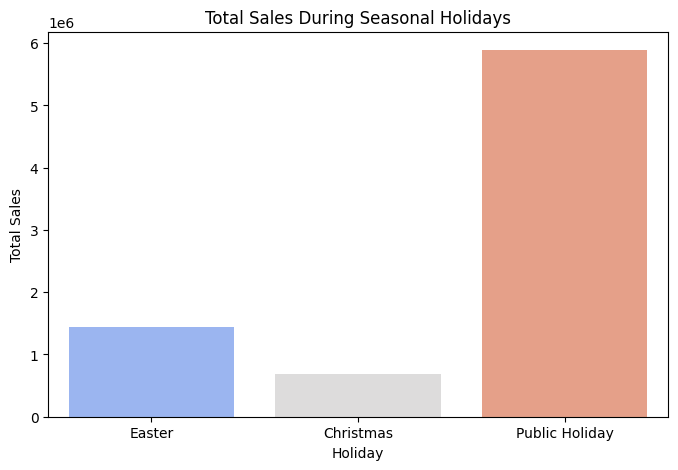

ANOVA Test Statistic: 10.212241988095077
P-Value: 3.684154668871422e-05
There is a significant difference in sales behavior across the ester christmas and public holidays 


In [11]:
bda.seasonal_holiday_behaviour(train)

### since the p_value 3.684154668871422×10−05 =0.00003684154668871422 There is a significant difference in sales behavior across the ester christmas and public holidays 
 - public holiday have a greatest sales it might implay that there is a riligious diversity

## What can you say about the correlation between sales and the number of customers?

2024-09-21 10:54:53,498 - root - INFO - performing the correlation between the number of customers and sales


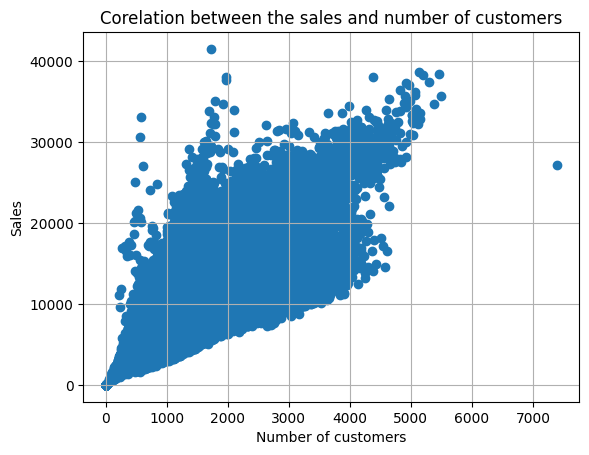

In [12]:
bda.corelation_sales_vs_no_of_customers(train)

#### Possible Reasons for the Outlier:
- Customer Behavior: Maybe a lot of customers came in, but they didn’t spend as much, leading to only moderate sales.
- Pricing or Promotions: There could have been a promotion that brought many customers, but the sales didn’t grow        proportionally due to discounted prices.
- Data Entry Error: It’s also possible that the number of customers was recorded incorrectly.
- Operational Constraints: The café or store may have reached a point of saturation where additional customers didn’t contribute significantly to sales, possibly due to limited stock or service capacity.

In [13]:
train[train['Customers'] > 6000]['Promo']

993496    1
Name: Promo, dtype: int64

#### since there ware a promotion that day it could not be an outliers

### so i will analyze it with promotion 

In [14]:
train[train['Customers'] > 6000]

,Unnamed: 0,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Holidayperiod
993496,993496,817,2,2013-01-22,27190,7388,1,1,0,0,Before Holiday


## How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?

2024-09-21 10:54:57,114 - root - INFO - The impact of promotion on the number of customers and sales
2024-09-21 10:54:57,366 - root - INFO - Visualizing the impact of promotion on number of customers and sales


Average customers during promotion days: 820.0988146773861
Average customers during non-promotion days: 517.8235417537579
Average sales during promotion days: 7991.152045969903
Average sales during non-promotion days: 4406.050805160786


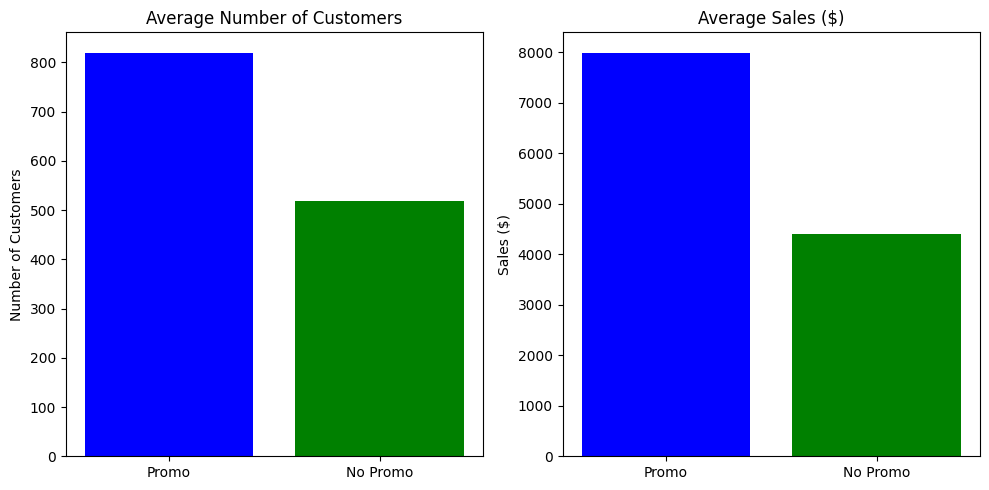

2024-09-21 10:54:57,785 - root - INFO - Impact of promotion on existing customers


Sales per customer during promotion days: 9.744133149507716
Sales per customer during non-promotion days: 8.50878812932767


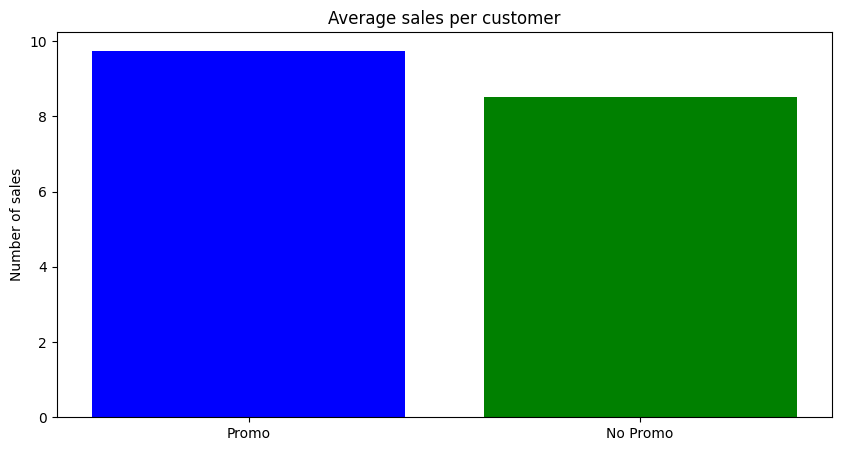

In [15]:
bda.impact_of_promotion_on_number_of_customers_and_sales(train)

### from this we can conclude that 
- During promotion both number of customers and sales increas
- and the exisiting customers also buy when there is promotion

## Could the promos be deployed in more effective ways? Which stores should promos be deployed in?

In [16]:
grouped_by_store_id_and_promo = bda.impact_of_promotion_by_store(train)

2024-09-21 10:54:58,184 - root - INFO - Anlayzing the better promotion on specific stores


In [17]:
grouped_by_store_id_and_promo

,Store,Promo,Customers,Sales
0,1,0,399.682131,3198.994845
1,1,1,577.522222,5152.886111
2,2,0,366.876289,2855.058419
3,2,1,678.702778,6172.816667
4,3,0,477.445017,3967.596220
...,...,...,...,...
2225,1113,1,754.250000,7320.086111
2226,1114,0,2353.958763,14477.742268
2227,1114,1,3165.383333,21601.497222
2228,1115,0,297.800687,4082.221649


2024-09-21 10:54:58,355 - root - INFO - calcuclating customer and sales uplift
2024-09-21 10:54:58,382 - root - INFO - visualizing the uplif


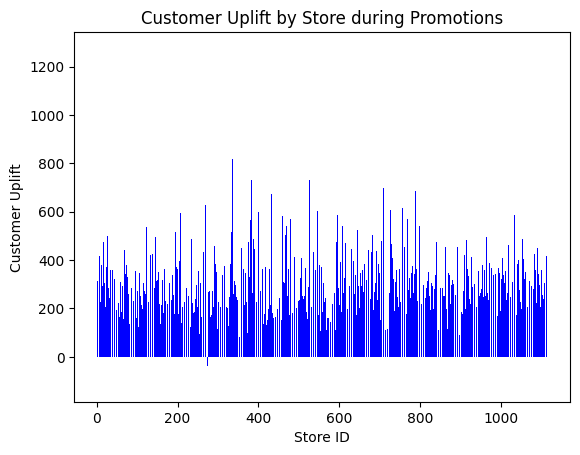

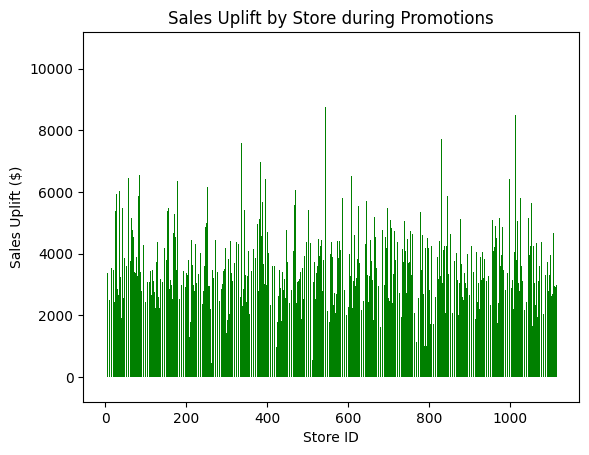

Customers                      Sales               Customer_Uplift  \
Promo            0            1             0             1                   
Store                                                                         
1       399.682131   577.522222   3198.994845   5152.886111      177.840092   
2       366.876289   678.702778   2855.058419   6172.816667      311.826489   
3       477.445017   851.213889   3967.596220   8608.666667      373.768872   
4       937.032646  1363.613889   6568.939863  10370.511111      426.581243   
5       325.092784   637.177778   2582.271478   5944.266667      312.084994   
...            ...          ...           ...           ...             ...   
1111    283.484536   519.152778   3073.487973   6395.294444      235.668242   
1112    534.424399   950.669444   5975.537801  12490.363889      416.245046   
1113    499.348797   754.250000   4400.362543   7320.086111      254.901203   
1114   2353.958763  3165.383333  14477.742268  21601.497222      811.424570   
1115    297.800687   457.122222   4082.221649   7073.266667      159.321535   

      Sales_Uplift  
Promo               
Store               
1      1953.891266  
2      3317.758247  
3      4641.070447  
4      3801.571249  
5      3361.995189  
...            ...  
1111   3321.806472  
1112   6514.826088  
1113   2919.723568  
1114   7123.754954  
1115   2991.045017  

[1115 rows x 6 columns]

In [18]:
bda.calculat_customer_and_sales_uplift(grouped_by_store_id_and_promo)

### in all of the store promotion increse both 
- customers 
- total sales
### so we can conclude that amlost it is nice to deploy it in all of the store as much as possible

## Trends of customer behavior during store opening and closing times


### since the opening and closing time are not give it doesn't make sense

## Which stores are open on all weekdays? How does that affect their sales on weekends? 

In [19]:
len(train['Store'].unique())

1115

In [20]:
bda.open_all_week_days(train)

,Store,DayOfWeek
0,1,"[5, 4, 3, 2, 1]"
1,2,"[5, 4, 3, 2, 1]"
2,3,"[5, 4, 3, 2, 1]"
3,4,"[5, 4, 3, 2, 1]"
4,5,"[5, 4, 3, 2, 1]"
...,...,...
1110,1111,"[5, 4, 3, 2, 1]"
1111,1112,"[5, 4, 3, 2, 1]"
1112,1113,"[5, 4, 3, 2, 1]"
1113,1114,"[5, 4, 3, 2, 1]"


2024-09-21 10:55:03,331 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-21 10:55:03,354 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


      Store    Sales
0         1   662358
1         2   384996
2         3   594242
3         4  1355202
4         5   278600
...     ...      ...
1110   1111   440689
1111   1112  1151380
1112   1113   789739
1113   1114  2939357
1114   1115   907634

[1115 rows x 2 columns]


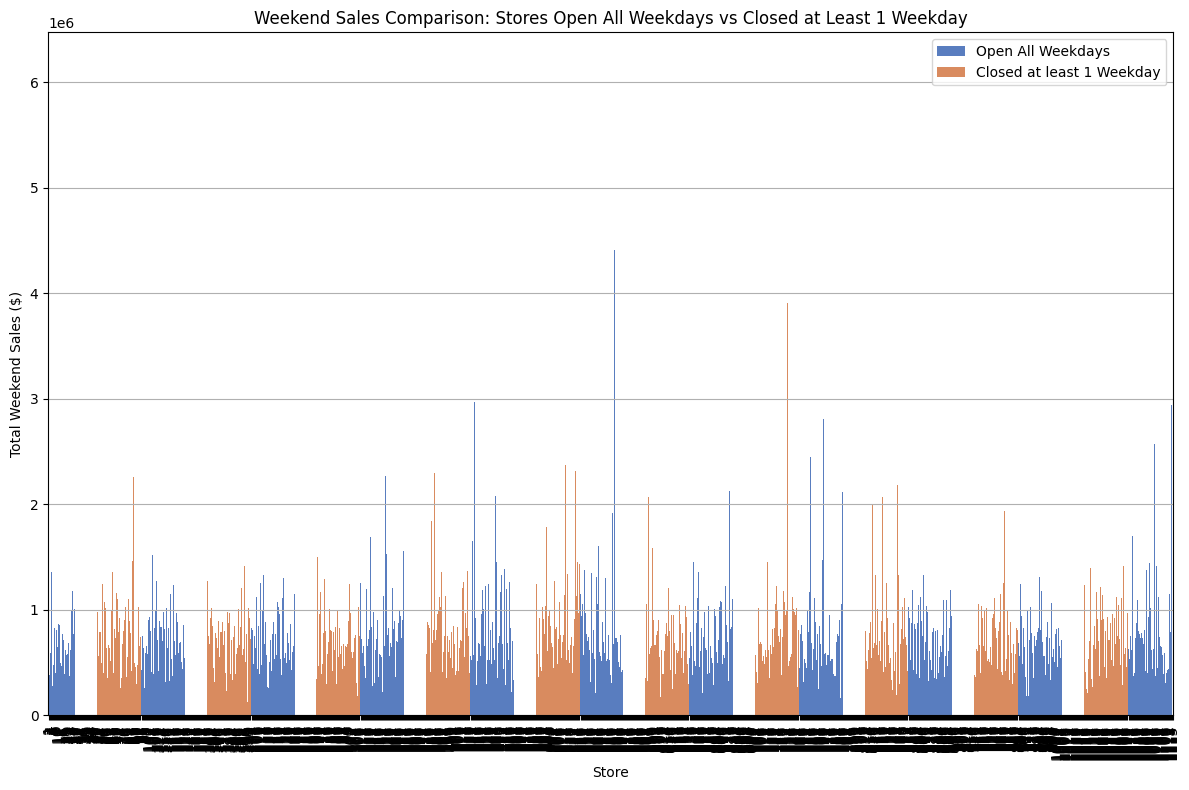

In [21]:
bda.analyze_weekday_closures_and_weekend_sales(train)

#### from this we can see that there is no much differnce

## Time Series Analysis

In [22]:
train_data = sa.set_date_index(train)
train_data

2024-09-21 10:55:16,896 - root - INFO - changing the date column to standaed date time format
2024-09-21 10:55:17,037 - root - INFO - making the date column the index of the data frame


,Unnamed: 0,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Holidayperiod
Date,,,,,,,,,,
2015-07-31,0,1,5,5263,555,1,1,0,1,During Holiday
2015-07-31,1,2,5,6064,625,1,1,0,1,During Holiday
2015-07-31,2,3,5,8314,821,1,1,0,1,During Holiday
2015-07-31,3,4,5,13995,1498,1,1,0,1,During Holiday
2015-07-31,4,5,5,4822,559,1,1,0,1,During Holiday
...,...,...,...,...,...,...,...,...,...,...
2013-01-01,1017204,1111,2,0,0,0,0,a,1,During Holiday
2013-01-01,1017205,1112,2,0,0,0,0,a,1,During Holiday
2013-01-01,1017206,1113,2,0,0,0,0,a,1,During Holiday


2024-09-21 10:55:17,068 - root - INFO - Plotting weekly sales ...


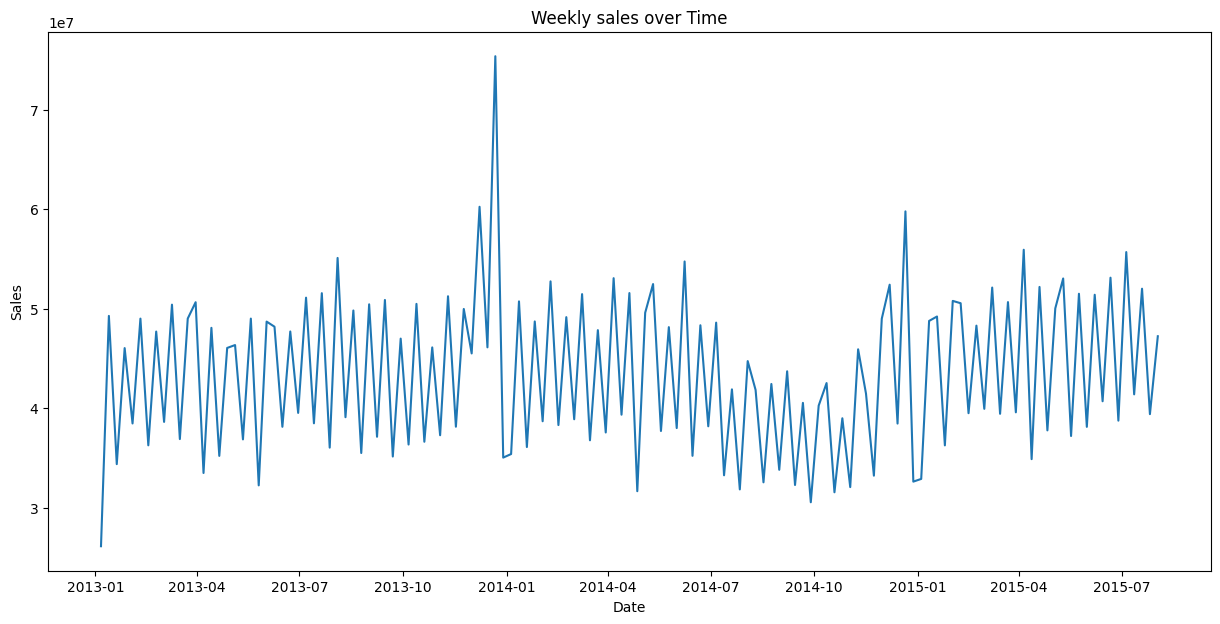

In [23]:
sa.plot_weekly_sales(train_data)

2024-09-21 10:55:17,727 - root - INFO - plotting the monthly sales ...


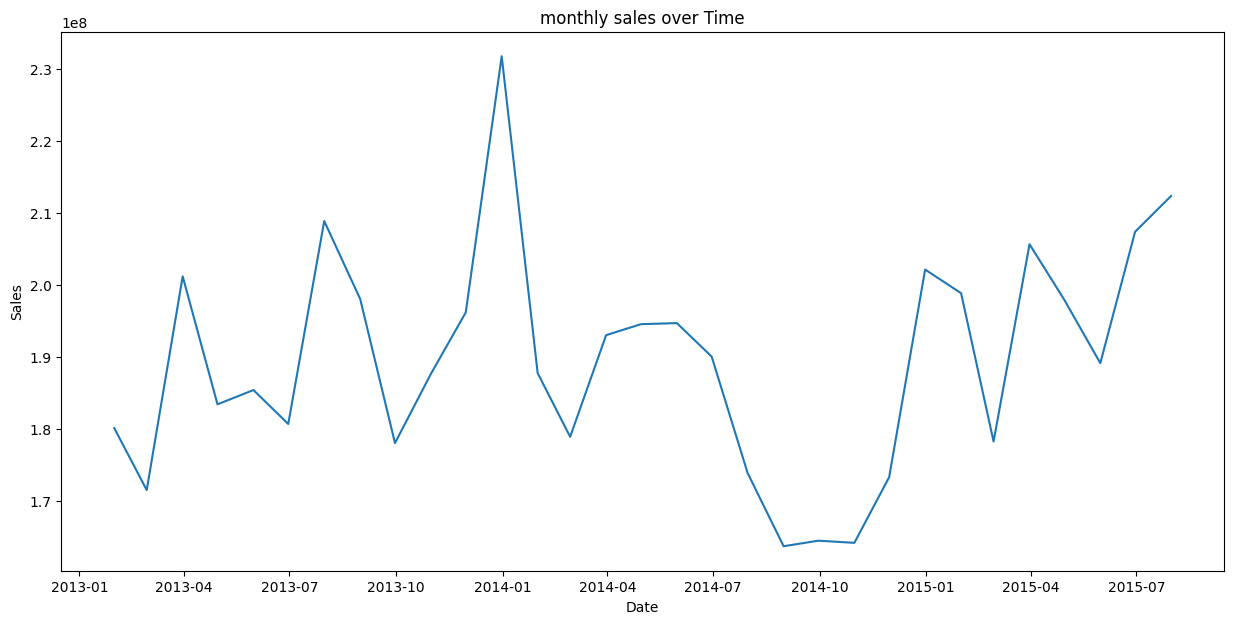

In [24]:
sa.plot_monthly_sales(train_data)

2024-09-21 10:55:18,281 - root - INFO - Performing seasonal decompotation ....


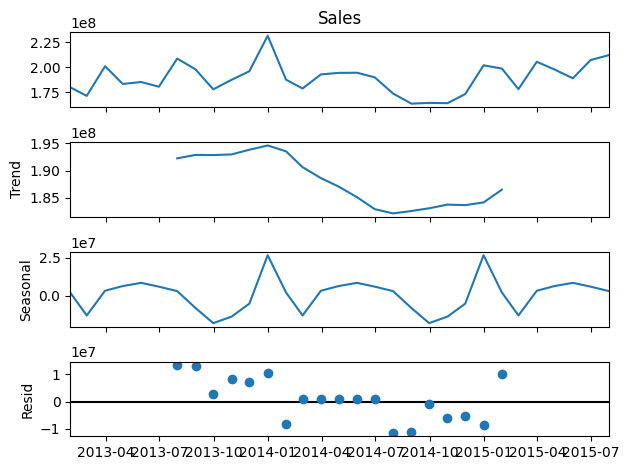

In [25]:
sa.plot_seasonal_decomposition(train_data)

2024-09-21 10:55:20,187 - root - INFO - Plotting rolling statistics ..


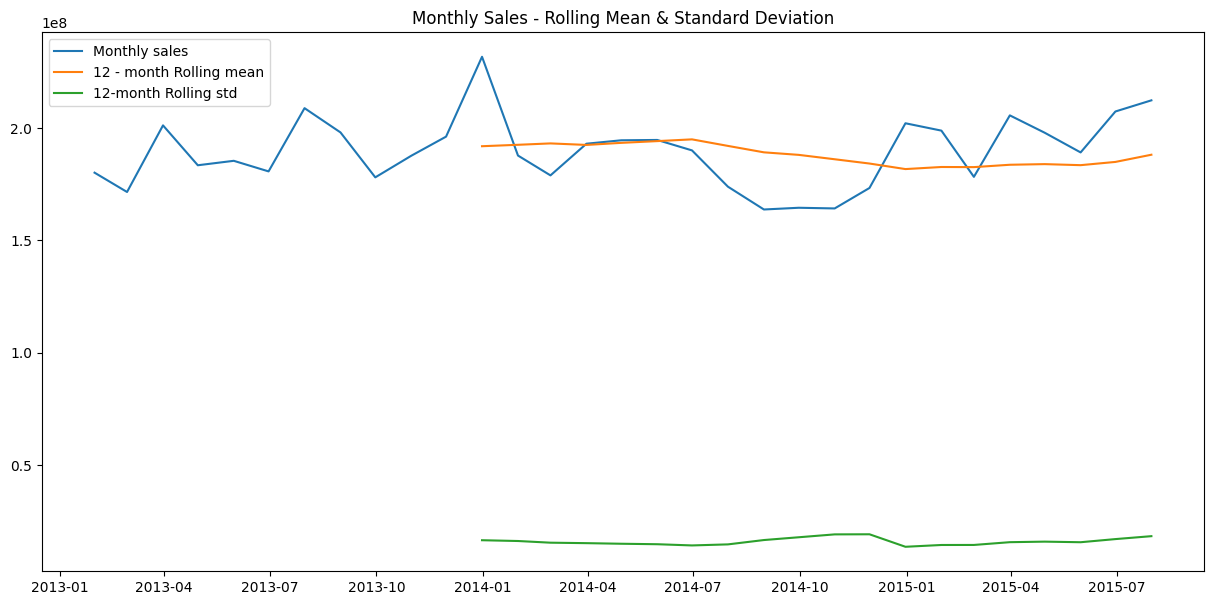

In [26]:
sa.plot_rolling_statistics(train_data)

2024-09-21 10:55:21,073 - root - INFO - PLotting average sales by day of week ..


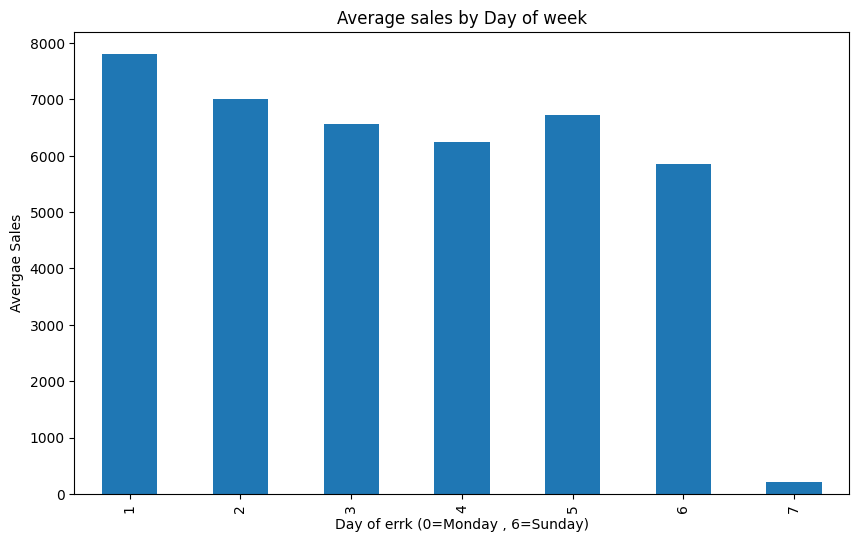

In [27]:
sa.plot_day_of_week_sales(train_data)

2024-09-21 10:55:21,350 - root - INFO - Plotting sales distribution: StateHoliday vs Non Holiday ....


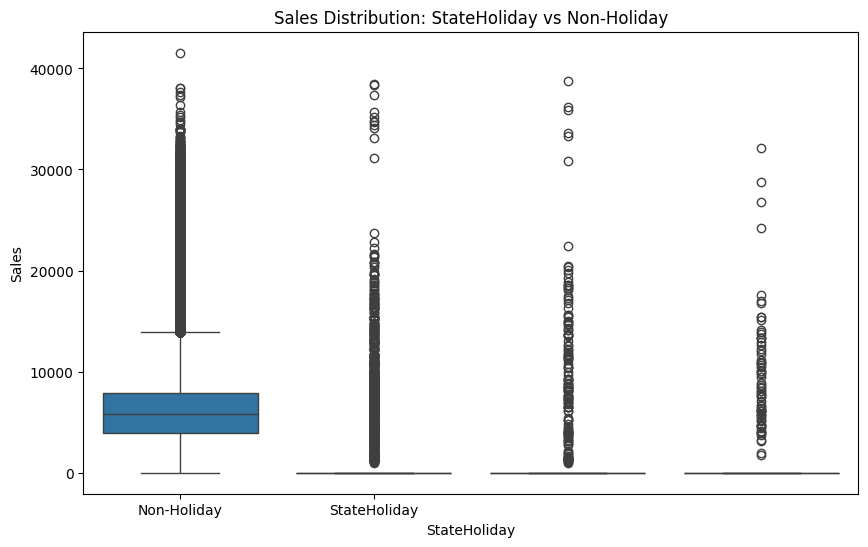

In [28]:
sa.plot__StateHoliday_sales_distribution(train_data)

2024-09-21 10:55:23,880 - root - INFO - Plotting sales distribution: SchoolHoliday vs Non Holiday ....
2024-09-21 10:55:24,795 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-21 10:55:25,586 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


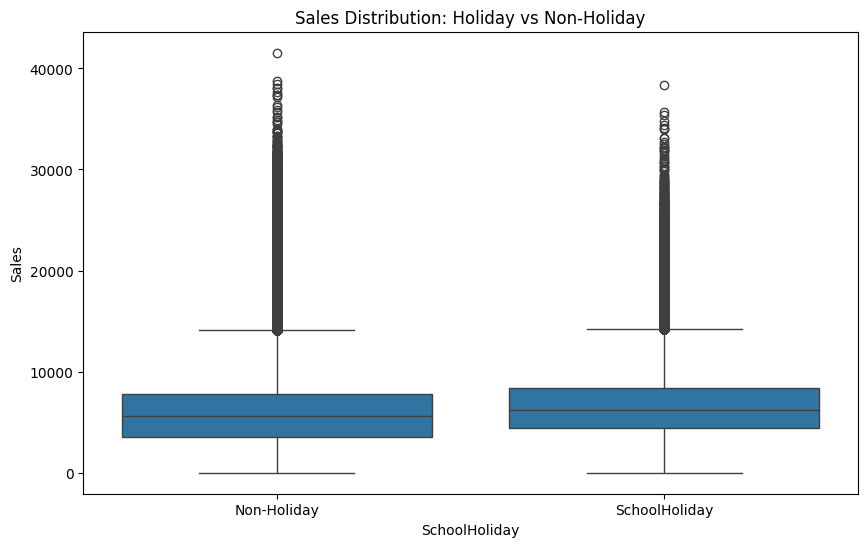

In [29]:
sa.plot__SchoolHoliday_sales_distribution(train_data)

In [30]:
sa.plot_store_type_performance(train_data)

2024-09-21 10:55:26,073 - root - INFO - Plotting store type performance over time...
2024-09-21 10:55:26,164 - root - ERROR - Error in plotting store type performance: 'Store_Type'


2024-09-21 10:55:26,191 - root - INFO - Plotting correlation between sales and customers...


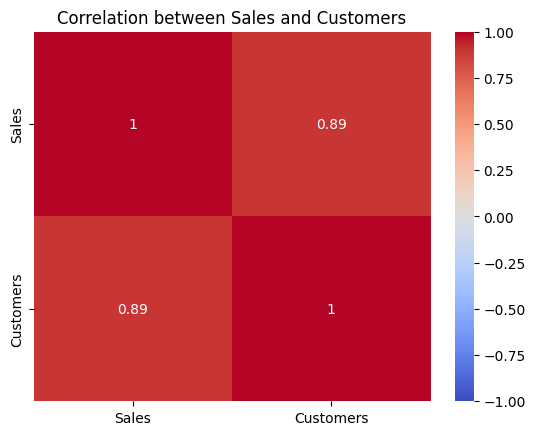

In [31]:
sa.plot_sales_correlation(train_data)

2024-09-21 10:55:26,488 - root - INFO - Plotting cumulative sales over time...


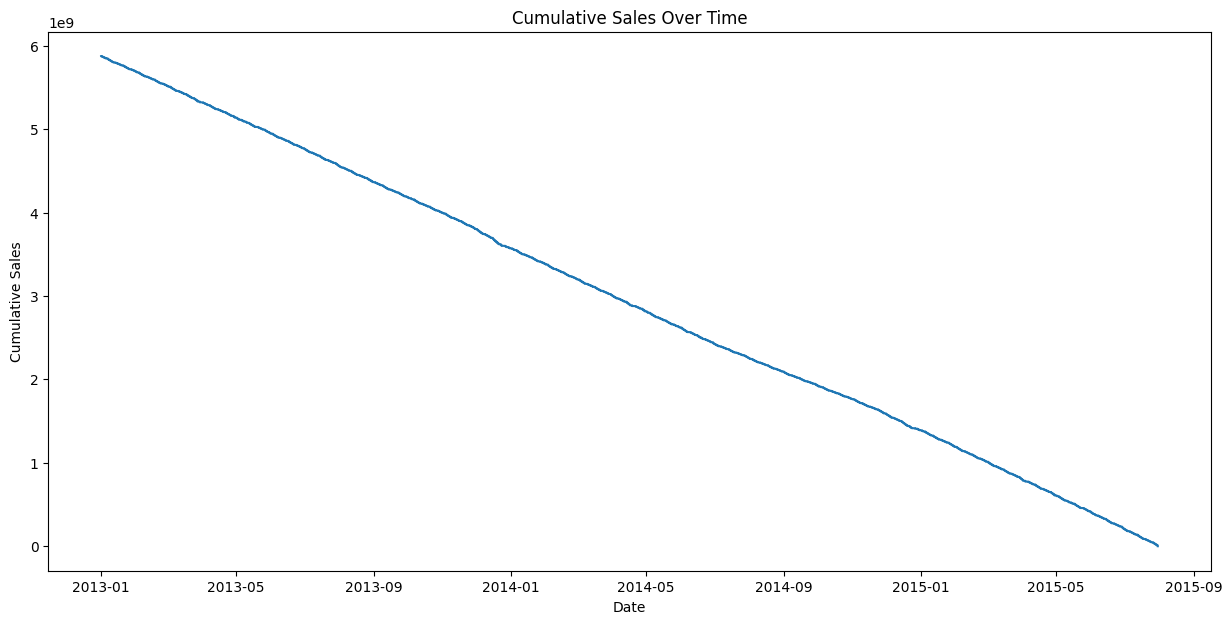

In [32]:
sa.plot_cumulative_sales(train_data)

2024-09-21 10:55:26,988 - root - INFO - Plotting daily sales growth rate...


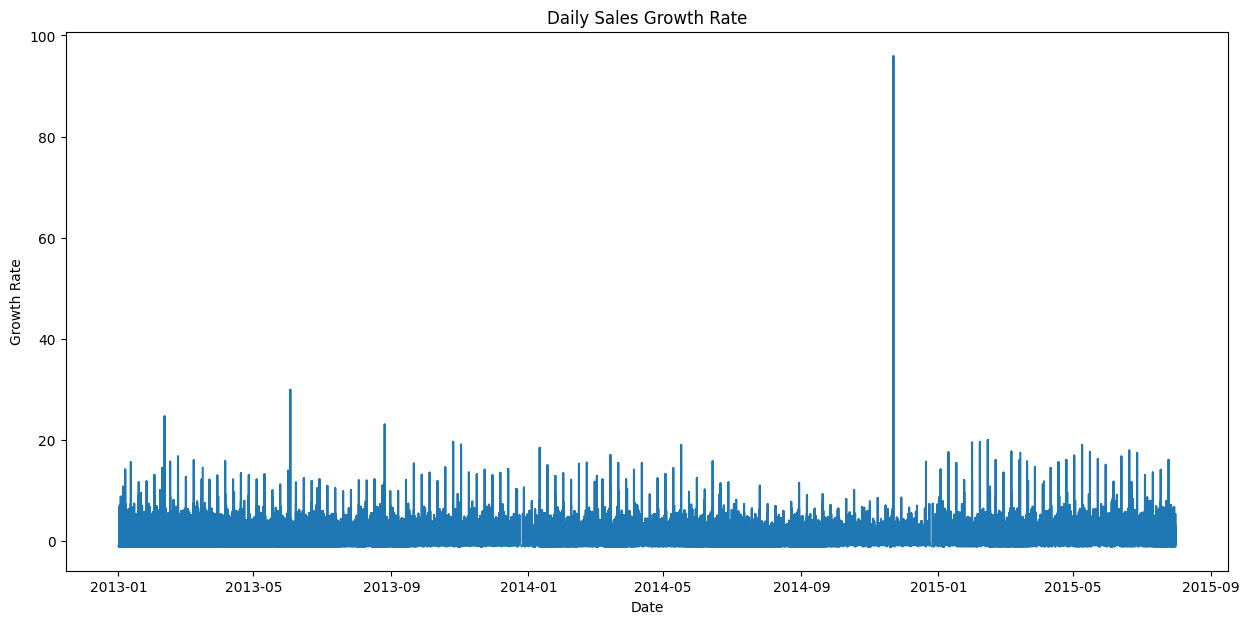

In [33]:
sa.plot_sales_growth_rate(train_data)

In [34]:
train.head()

,Unnamed: 0,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Holidayperiod,CumulativeSales,SalesGrowthRate
Date,,,,,,,,,,,,
2015-07-31,0,1,5,5263,555,1,1,0,1,During Holiday,5263,NaN
2015-07-31,1,2,5,6064,625,1,1,0,1,During Holiday,11327,0.152195
2015-07-31,2,3,5,8314,821,1,1,0,1,During Holiday,19641,0.371042
2015-07-31,3,4,5,13995,1498,1,1,0,1,During Holiday,33636,0.683305
2015-07-31,4,5,5,4822,559,1,1,0,1,During Holiday,38458,-0.655448
